In [23]:
from tensorflow.keras.datasets.mnist import load_data

In [24]:
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [25]:
# x_train[4], y_train[4]
x_train[50000], y_train[50000]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  47, 160, 195,
         205,  71,  86,  13,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  12, 238, 254, 254,
         254, 254, 254, 227,  84,   0,   0,   0,   0,   0,   0,   0,   0,
           0

3 <class 'numpy.uint8'>


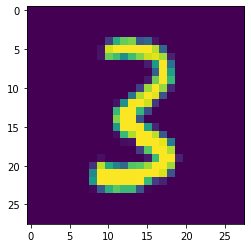

In [26]:
import matplotlib.pyplot as plt

plt.imshow(x_train[50000])
print(y_train[50000], type(y_train[50000]))

reshape를 통해 차원을 줄여줌

In [27]:
x_train = x_train.reshape(-1,28*28)
x_train.shape

(60000, 784)

In [28]:
x_test = x_test.reshape(-1, 28*28)
x_test.shape

(10000, 784)

In [29]:
y_train[2:10], y_train.shape

(array([4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8), (60000,))

In [30]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# apply model

In [31]:
import tensorflow as tf

In [36]:
model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(784,))) # input layer
model.add(tf.keras.layers.Dense(64, activation='relu')) # hidden layer
model.add(tf.keras.layers.Dense(64, activation='relu')) # hidden layer
# 결과값 3개 이상 softmax 사용, 결과 binary --> sigmoid 사용
model.add(tf.keras.layers.Dense(10, activation='softmax')) # output layer

# regression --> loss : mse
# bianry classification --> loss : binary crossentropy
# over 3 classification --> loss : categorical crossentropy(onehot encoding), spars_categorical_crossentropy(onehot encoding X)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

spars_categorical_crossentropy   -->  onehot encoding을 안 해줬을 때<br>
categorical_crossentropy   -->  one hot encoding을 했을 때

In [37]:
hist = model.fit(x_train, y_train, epochs=100, validation_split=0.3)

Epoch 1/100


Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7facef95e680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


1313/1313 [==============================] - 34s 2ms/step - loss: 2.2855 - acc: 0.8240 - val_loss: 0.5770 - val_acc: 0.8797
Epoch 2/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3787 - acc: 0.9091 - val_loss: 0.3202 - val_acc: 0.9179
Epoch 3/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2574 - acc: 0.9321 - val_loss: 0.2760 - val_acc: 0.9268
Epoch 4/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2083 - acc: 0.9425 - val_loss: 0.2707 - val_acc: 0.9327
Epoch 5/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1835 - acc: 0.9479 - val_loss: 0.2467 - val_acc: 0.9329
Epoch 6/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1582 - acc: 0.9540 - val_loss: 0.1986 - val_acc: 0.9483
Epoch 7/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1410 - acc: 0.9606 - val_loss: 0.1842 - val_acc: 0.9518
Epoch 8/100
1313/1313 [==============================] - 3s 2ms/st

# evaluation

In [38]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

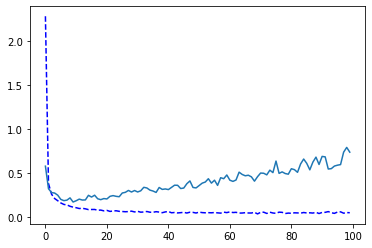

In [44]:
import matplotlib.pyplot as plot

plt.plot(hist.history['loss'], 'b--')
plt.plot(hist.history['val_loss'])
plt.show()

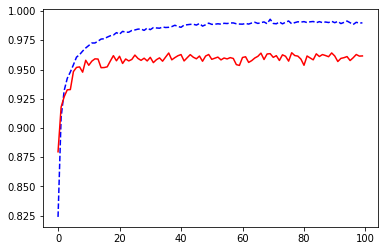

In [45]:
plt.plot(hist.history['acc'], 'b--')
plt.plot(hist.history['val_acc'], 'r')

# service

In [46]:
y_test[30]

3

In [49]:
x_test[30]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  21, 113, 193, 254, 253, 25

In [50]:
model.predict([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  21, 113, 193, 254, 253, 254, 253,
       254, 172,  82,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 183, 253, 252, 253, 252,
       253, 252, 253, 252, 243,  40,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 203, 255, 233,
       183, 102, 203, 203, 234, 253, 254, 151,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  81,
       151,  50,   0,   0,   0,  41, 193, 252, 253, 111,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  11, 213, 254, 253, 203,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 123, 213, 252, 253, 252,  81,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  51, 253, 254, 253, 254,
       151,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10, 212, 253,
       252, 253, 232, 223, 122,  82,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 123, 223, 254, 253, 254, 253, 254,  71,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,  20,  50, 131, 213, 252, 253, 192,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 162, 254, 253,
       102,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 203,
       253, 252,  61,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       132, 253, 254,  91,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        21, 142, 253, 252, 233,  30,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  41, 214, 253, 254, 213,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 163, 243, 253, 252, 172,  10,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        11, 173, 173, 253, 255, 253, 224,  81,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 132, 252, 253, 252, 253, 171,  20,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 153, 253, 244, 203,  82,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  92, 192, 122,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0]])

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)